## Narrative Analytics and Experimentation
__MAY,2018 - Christopher Sanchez__

My goal in this experiment is to explore this dataset that was sent to me via email from a job agency containing information about The United States Olympic Committee's website in order to find any interesting data that may pose a question to be answered in an A/B Test. The data contains 1370 rows spread across 9 columns.

### What can we learn from this data?

-  What percentage of page views are unique?
-  Is there a relationship between page views and entrances?
-  Is there a realtionship between page views and bounce rate?
-  Is there a relationship between page views and exit?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

web_page = pd.read_csv('pages.csv', encoding='utf-8')

__Displaying the head of the data.__

In [2]:
web_page.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,# TeamUSA only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# Pages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 20170301-20170930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_The first few lines of the data seem to be blank values, and the categories are unnamed._

__Cleaning the data.__

In [3]:
web_page = web_page[6:]
web_page = web_page.rename(columns={'Unnamed: 1': 'Page_Title', 'Unnamed: 2': 'Page_Views','Unnamed: 3': 'Unique_Page_Views', 'Unnamed: 4': 'AVG_Time_On_Page','Unnamed: 5': 'Entrances', 'Unnamed: 6': 'Bounce_Rate', 'Unnamed: 7': 'Exit', 'Unnamed: 8': 'Page_Value'})
web_page.Page_Views = web_page.Page_Views.str.replace(',', '')
web_page.Page_Views = web_page.Page_Views.astype(float)
web_page.Unique_Page_Views = web_page.Unique_Page_Views.str.replace(',', '')
web_page.Unique_Page_Views = web_page.Unique_Page_Views.astype(float)
web_page.Entrances = web_page.Entrances.str.replace(',', '')
web_page.Entrances = web_page.Entrances.astype(float)
web_page.Bounce_Rate = web_page.Bounce_Rate.str.replace('%', '')
web_page.Bounce_Rate = web_page.Bounce_Rate.astype(float)
web_page.Exit = web_page.Exit.str.replace('%', '')
web_page.Exit = web_page.Exit.astype(float)

_I converted the numerical data to floats which will allow me to compute the data programmatically. I renamed the columns to their proper names._

__Displaying the new and improved cleaned head of the data.__

In [4]:
web_page.head()

,# ----------------------------------------,Page_Title,Page_Views,Unique_Page_Views,AVG_Time_On_Page,Entrances,Bounce_Rate,Exit,Page_Value
6,/News/2017/May/06/Olympic-Family-Mourns-The-Lo...,Olympic Family Mourns The Loss Of Olympic Cham...,116505.0,113820.0,0:02:33,111287.0,97.37,96.18,$0.00
7,/News/2017/June/22/Pregnant-Alysia-Montano-Is-...,Pregnant Alysia Montano Is Literally Wonder Wo...,82573.0,80071.0,0:02:25,78606.0,96.31,95.79,$0.00
8,/News/2017/July/16/Meryl-Davis-Announces-Engag...,Meryl Davis Announces Engagement To Former Can...,48488.0,46749.0,0:01:47,45589.0,93.77,91.94,$0.00
9,/News/2017/July/19/Meryl-Davis-Opens-Up-About-...,"Meryl Davis Opens Up About The Proposal, Her C...",43483.0,40218.0,0:03:30,39486.0,87.95,86.46,$0.00
10,/News/2017/August/05/Justin-Gatlin-Beats-Usain...,Justin Gatlin Beats Usain Bolt To Win First 10...,32163.0,31156.0,0:03:27,30637.0,95.92,94.88,$0.00


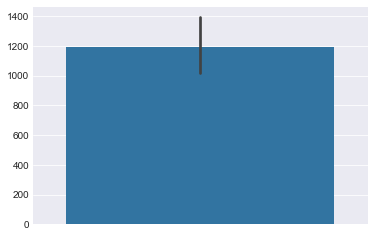

In [37]:
sns.barplot(x=[web_page.Page_Views, web_page.Unique_Page_Views]);


__What is the mean and standard deviation of page views, unique page views, entrances, bounce rate and exit?__

In [6]:
web_page.describe()

,Page_Views,Unique_Page_Views,Entrances,Bounce_Rate,Exit
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,1219.194161,1162.593431,1054.102920,86.629467,81.654131
std,4809.969773,4654.960003,4544.892014,24.014750,20.628193
min,31.000000,31.000000,0.000000,0.000000,0.000000
25%,122.000000,92.000000,61.000000,85.510000,75.000000
50%,336.000000,305.000000,214.000000,94.805000,86.340000
75%,885.000000,824.000000,694.250000,100.000000,100.000000
max,116505.000000,113820.000000,111287.000000,100.000000,100.000000


_Page views, unique page views, and entrances have very similar means and standard deviations indicating that most page views come from entrances. The posting with the most page views had 116,505 views with 113,820 being unique and 111,287 coming from entrances which shows even the most popular posts are coming from external sources and are not interested in navigating the website further._

#### What % of page views are unique?

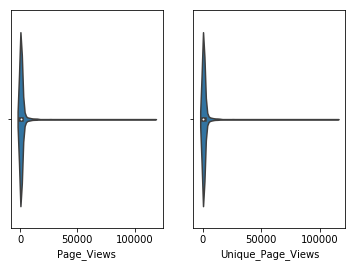

In [7]:
plt.subplot(1,2,1)
sns.violinplot(web_page.Page_Views);
plt.subplot(1,2,2)
sns.violinplot(web_page.Unique_Page_Views);

In [8]:
web_page.Unique_Page_Views.sum() / web_page.Page_Views.sum()

0.95357529443883

_95% of page views are unique. It appears that most visitors only come to the website once. The average page views is 1,219 with an average of 1,162 unique visitors. There doesn't seem to be much exploration of the website going on. The data also indicates there are very few return visitors._

#### Is there a relationship between page views and entrances?

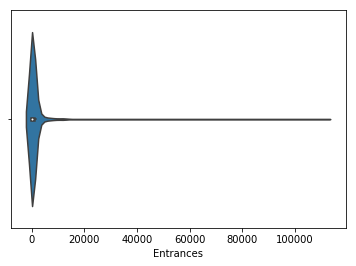

In [9]:
sns.violinplot(web_page.Entrances);

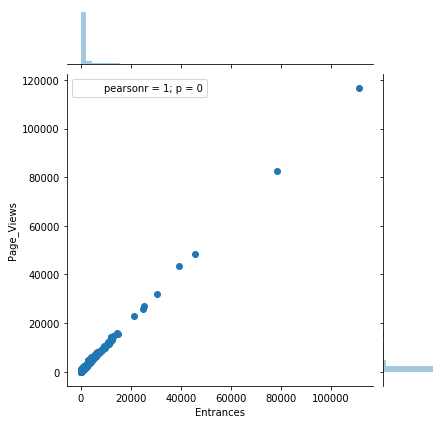

In [10]:
sns.jointplot(web_page.Entrances, web_page.Page_Views);

In [11]:
web_page.Entrances.sum() / web_page.Page_Views.sum()

0.8645898691010455

_There is a strong positive correlation between entrances and page views with a pearson r value of one. The data is indicating the majority of pageviews come from the entrance with 86% of page views deriving from the entrance._

#### Is there a relationship between page views and bounce rate?

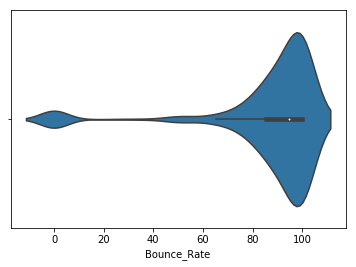

In [12]:
sns.violinplot(web_page.Bounce_Rate);

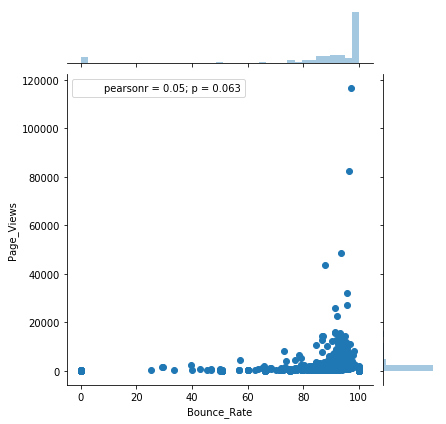

In [13]:
sns.jointplot(web_page.Bounce_Rate, web_page.Page_Views);

_The bounce rate is very high with an average of nearly 87% of visitors viewing one posting and then leaving. There is not a strong correlation between bounce rate and page views with a pearson r value of only .05._

#### Is there a relationship between page views and exit?

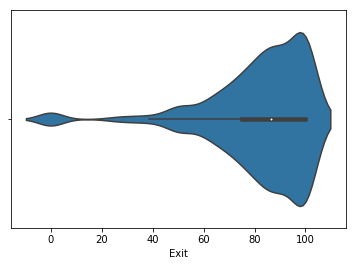

In [14]:
sns.violinplot(web_page.Exit);

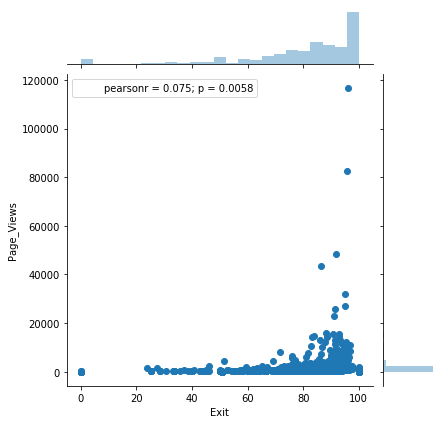

In [15]:
sns.jointplot(web_page.Exit, web_page.Page_Views);

Page views, Unique page views, and Entrances all have a strong correlation amongst each other. The data suggests that a majority of people are coming to the website from an outside source reading the article and then proceeding to leave the website. 

_There is not a relationship between page views and exit with a pearson r value of 0.075._

### Summary and Test

_The mean and standard deviation values of page views, unique page views, and entrances are all very similar. There is a high bounce rate and a high exit rate._

_There is a very strong correlation between entrances and page views._

__Will redesigning the way new stories are displayed to visitors on the website decrease bounce rate?__
_The data is indicating that people are coming to the website from an outside source, because many people are just making an enterance, reading one article and leaving, not staying around to read other articles._

__Redesigning the way news stories are displayed to visitors will decrease bounce rate.__

 _Alternate the new design and the old design between each unique visitor for the next three months. The key metric to monitor is the bounce rate between the new design and the old design. A secondary metric to watch is the rate of page views and enterances. This is an A/B test where The United States Olympic Committees website utilizes the new design vs the old design.
<br>
<br>
We will analyze the data for three months prior to starting the study and compare it to the new design and the old design for three months during the study.
<br>
<br>
If bounce rate decreases by an average of 10% over the next three months amongst the new design group then conclude that the new design is effective and implement the new design for the entire population. If the bounce rate decreases, but less than one standard deviation, then continue the study for two more months and then make a final decision. If the bounce rate does not decrease during the study then continue with the original design._